## Data Preprocessing Insights

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### __Feature engineering example__

In [6]:
# Feature engineering example

# Create some data
X = np.array([1,3,2,5,6,8,7,9,8,5,4])
y = np.array([  0.8, 10.2, 3.8, 38.0, 61.8, 135.2,  93.8, 187.2, 135.2 , 38.0,21.2])
df = pd.DataFrame({'X': X, 'y': y})


print(df)

    X      y
0   1    0.8
1   3   10.2
2   2    3.8
3   5   38.0
4   6   61.8
5   8  135.2
6   7   93.8
7   9  187.2
8   8  135.2
9   5   38.0
10  4   21.2


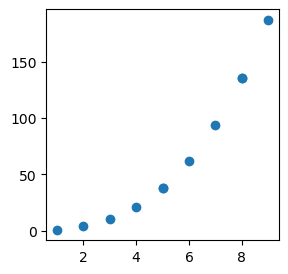

In [7]:
# Plotting this data you will notice that the relationship is not linear between X and y
plt.figure(figsize=(3,3))
plt.scatter(df['X'],df['y'])
plt.show()

#### A Linear regression model will not fit this data well. 

In other words, the model is not able to find a function relating X and y as it is trying to build it based on the function : $h_\theta(X) = \theta_0 + \theta_1 * X$.<br>
The function the model needs to find, looking at the nature of the curve, could be : $h_\theta(X) = \theta_0 + \theta_1 * X + \theta_2 * X^2$<br><br>
But we do not have the $X^2$ terms in our data.<br>
However, we can feature engineer the dataset and add the $X^2$ term in our dataset.

Having more than 3 dimensions where you cannot visualize the graph requires trial and error of 2nd order polynomial firt, 3rd order polynomial fit, etc.

In [8]:
# Example of feature engineering 
# The plot looks like it may need a polynomial of degree 2.

df['poly_2'] = df['X'] **2  # Adding the polynomial feature to the original dataset

print(f"Feature engineered dataset :\n{df}")

# So now we have 2 features (one original and one which we engineered) 
# We could separate X and y

print(f"\n\nNew X and y")
X_new = df.drop('y',axis=1)
y = df['y']

print(X_new,y)

Feature engineered dataset :
    X      y  poly_2
0   1    0.8       1
1   3   10.2       9
2   2    3.8       4
3   5   38.0      25
4   6   61.8      36
5   8  135.2      64
6   7   93.8      49
7   9  187.2      81
8   8  135.2      64
9   5   38.0      25
10  4   21.2      16


New X and y
    X  poly_2
0   1       1
1   3       9
2   2       4
3   5      25
4   6      36
5   8      64
6   7      49
7   9      81
8   8      64
9   5      25
10  4      16 0       0.8
1      10.2
2       3.8
3      38.0
4      61.8
5     135.2
6      93.8
7     187.2
8     135.2
9      38.0
10     21.2
Name: y, dtype: float64


The model will most likely fit the the data well and we should get much better results.

Please nore one very important thing: If you feature engineer your dataset and create a model with it, then the model always expects any new inputs for prediction to have as many number of features as it was built with. In the above example the model expects as inputs 2 features. 

__So, you must have built into your prediction function a preprocessing step where the new input is taken and an additional features are added (same way as above) before feeding the input to the model.__

For plotting the line of regression (a curve in such cases), you plot the scatter plot of the original data and super impose the regression line by generating the 'y_predicted' values as<br> model.__predict(X_new)__

### __Outlier identification example__

In [9]:

# Example data
data = [6, 8, 10, 12, 14, 16, 18, 20]

# Create a pandas Series
data_series = pd.Series(data)

# Calculate Q1 and Q3
Q1 = data_series.quantile(0.25)
Q3 = data_series.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")


Q1: 9.5
Q3: 16.5
IQR: 7.0


#### Now you can apply the formulas for the upper and lower bounds and all data points above and below the bounds are considered outliers. You can then remove them as part of the data preprocessing step ####

Lower bound: Q1−1.5×IQRQ1−1.5×IQR<br>
Upper bound: Q3+1.5×IQRQ3+1.5×IQR


### __Correlation__

In [10]:
# Sample data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 4, 16, 1, 10],
    'C': [5, 1, 9, 11, 13],
    'D': [10, 5, 8, 7, 6]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the Pearson correlation coefficient matrix
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          A         B         C         D
A  1.000000  0.325816  0.853492 -0.493197
B  0.325816  1.000000  0.342253 -0.053564
C  0.853492  0.342253  1.000000  0.032380
D -0.493197 -0.053564  0.032380  1.000000
